#### Nome Completo

Matheus Prudencio dos Santos

#### Características do Dataset

É um dataset para o diaginostico de cancers de mama malignos e benignos, onde suas features descrevem as seguintes informações:

 #  Attribute                     Domain
   -- -----------------------------------------
   1. Sample code number            id number
   2. Clump Thickness               1 - 10
   3. Uniformity of Cell Size       1 - 10
   4. Uniformity of Cell Shape      1 - 10
   5. Marginal Adhesion             1 - 10
   6. Single Epithelial Cell Size   1 - 10
   7. Bare Nuclei                   1 - 10
   8. Bland Chromatin               1 - 10
   9. Normal Nucleoli               1 - 10
  10. Mitoses                       1 - 10
  11. Class:                        (2 for benign, 4 for malignant)

#### Fonte do Dataset

https://archive.ics.uci.edu/ml/datasets/Breast+Cancer+Wisconsin+%28Diagnostic%29

## Desenvolvimento

In [1]:
from sklearn.decomposition import PCA
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

import pandas as pd
import numpy as np
import seaborn as sbn
%matplotlib inline


In [2]:
columns = ['iD',  'Clump _Thickness' ,'Uniform_Cell_Size','Uniform_Cell_Shape',
 'Marginal_Adhesion', 'Single_Epithelial_Cell_Size','Bare Nuclei', 'Bland Chromatin',
'Normal_Nucleoli','Mitoses', 'Class']

base= pd.read_csv('breast-cancer-wisconsin.data', header = None, names=columns)
base.drop(['iD'], axis=1, inplace=True)
print(base.shape)
base.head(5)

(699, 10)


,Clump _Thickness,Uniform_Cell_Size,Uniform_Cell_Shape,Marginal_Adhesion,Single_Epithelial_Cell_Size,Bare Nuclei,Bland Chromatin,Normal_Nucleoli,Mitoses,Class
0,5,1,1,1,2,1,3,1,1,2
1,5,4,4,5,7,10,3,2,1,2
2,3,1,1,1,2,2,3,1,1,2
3,6,8,8,1,3,4,3,7,1,2
4,4,1,1,3,2,1,3,1,1,2


# Limpando os Dados

### Dados Faltantes

Vou usar seaborn para criar um heatmap para procurar dados faltantes

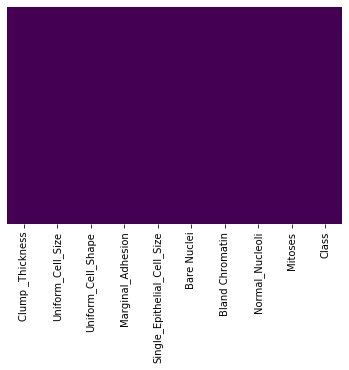

In [3]:
sbn.heatmap(base.isnull(),yticklabels=False,cbar=False,cmap='viridis')

Apesar disto, na descrição do dataset temos a seguinte informação:

8. Missing attribute values: 16

   There are 16 instances in Groups 1 to 6 that contain a single missing 
   (i.e., unavailable) attribute value, now denoted by "?".  
   
então vamos tratar esses dados


In [4]:
base.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 699 entries, 0 to 698
Data columns (total 10 columns):
Clump _Thickness               699 non-null int64
Uniform_Cell_Size              699 non-null int64
Uniform_Cell_Shape             699 non-null int64
Marginal_Adhesion              699 non-null int64
Single_Epithelial_Cell_Size    699 non-null int64
Bare Nuclei                    699 non-null object
Bland Chromatin                699 non-null int64
Normal_Nucleoli                699 non-null int64
Mitoses                        699 non-null int64
Class                          699 non-null int64
dtypes: int64(9), object(1)
memory usage: 54.7+ KB


Como apenas Bare Nuclei é um object vou investiga-lo atrás dos 16 " ? "

In [5]:
base['Bare Nuclei'].value_counts()

1     402
10    132
2      30
5      30
3      28
8      21
4      19
?      16
9       9
7       8
6       4
Name: Bare Nuclei, dtype: int64

Todos os 16 dados faltantes estão nessa feature.

In [6]:
h = base.loc[(base['Bare Nuclei']) == '?'].index
base.loc[(base['Bare Nuclei']) == '?']

,Clump _Thickness,Uniform_Cell_Size,Uniform_Cell_Shape,Marginal_Adhesion,Single_Epithelial_Cell_Size,Bare Nuclei,Bland Chromatin,Normal_Nucleoli,Mitoses,Class
23,8,4,5,1,2,?,7,3,1,4
40,6,6,6,9,6,?,7,8,1,2
139,1,1,1,1,1,?,2,1,1,2
145,1,1,3,1,2,?,2,1,1,2
158,1,1,2,1,3,?,1,1,1,2
164,5,1,1,1,2,?,3,1,1,2
235,3,1,4,1,2,?,3,1,1,2
249,3,1,1,1,2,?,3,1,1,2
275,3,1,3,1,2,?,2,1,1,2
292,8,8,8,1,2,?,6,10,1,4


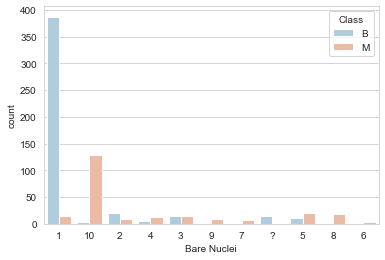

In [7]:
for x in range(699):
    if base.iloc[x,9] == 2:
        base.iloc[x,9] = 'B'
    if base.iloc[x,9] == 4:
        base.iloc[x,9] = 'M'
        
sbn.set_style('whitegrid')
sbn.countplot(x=base['Bare Nuclei'], data=base,hue=base['Class'], palette='RdBu_r')

Vou trocar os ? pelos valores mais frequentes no grafico, ou seja, quando a classe for B o ? sera substituido por 1 e quando for M por 10.

In [8]:
def miss_val(x):
    Bare = x[0]
    Class = x[1]
    
    if Bare == '?' :

        if Class == 'M':
            return '10'

        else:
            return '1'

    else:
        return Bare 

In [9]:
base['Bare Nuclei'] = base[['Bare Nuclei','Class']].apply(miss_val,axis=1)

base['Bare Nuclei'].value_counts()

1     416
10    134
2      30
5      30
3      28
8      21
4      19
9       9
7       8
6       4
Name: Bare Nuclei, dtype: int64

Agora que removi os valores faltantes vou transformar essa feature para o formato int 64 igual as outras features

In [10]:
base["Bare Nuclei"] = pd.to_numeric(base["Bare Nuclei"])

base.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 699 entries, 0 to 698
Data columns (total 10 columns):
Clump _Thickness               699 non-null int64
Uniform_Cell_Size              699 non-null int64
Uniform_Cell_Shape             699 non-null int64
Marginal_Adhesion              699 non-null int64
Single_Epithelial_Cell_Size    699 non-null int64
Bare Nuclei                    699 non-null int64
Bland Chromatin                699 non-null int64
Normal_Nucleoli                699 non-null int64
Mitoses                        699 non-null int64
Class                          699 non-null object
dtypes: int64(9), object(1)
memory usage: 54.7+ KB


### Outliers

In [11]:
base.describe()

,Clump _Thickness,Uniform_Cell_Size,Uniform_Cell_Shape,Marginal_Adhesion,Single_Epithelial_Cell_Size,Bare Nuclei,Bland Chromatin,Normal_Nucleoli,Mitoses
count,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000
mean,4.417740,3.134478,3.207439,2.806867,3.216023,3.512160,3.437768,2.866953,1.589413
std,2.815741,3.051459,2.971913,2.855379,2.214300,3.636146,2.438364,3.053634,1.715078
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,2.000000,1.000000,1.000000,1.000000,2.000000,1.000000,2.000000,1.000000,1.000000
50%,4.000000,1.000000,1.000000,1.000000,2.000000,1.000000,3.000000,1.000000,1.000000
75%,6.000000,5.000000,5.000000,4.000000,4.000000,6.000000,5.000000,4.000000,1.000000
max,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000


Não existem outliers pois os dados estão contidos no intervalo de 0 até 10

# EDA

#### As classes são balanceadas?

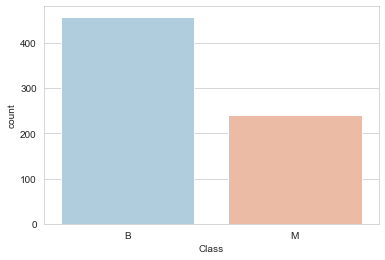

In [12]:
sbn.set_style('whitegrid')
sbn.countplot(x=base['Class'], data=base, palette='RdBu_r')

Como as classes são balanceadas posso olhar para as features e procurar informações

#### Como os dados estão distribuidos?

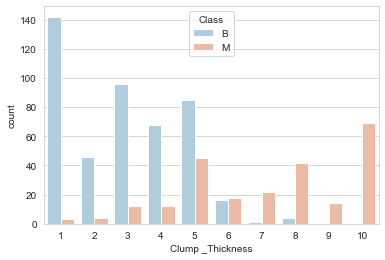

In [13]:
sbn.set_style('whitegrid')
sbn.countplot(x=base['Clump _Thickness'], data=base,hue=base['Class'], palette='RdBu_r')

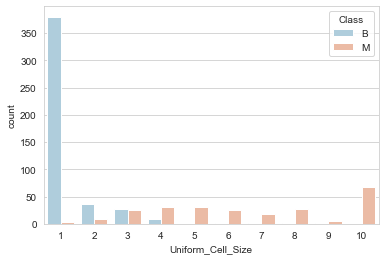

In [14]:
sbn.set_style('whitegrid')
sbn.countplot(x=base['Uniform_Cell_Size'], data=base,hue=base['Class'], palette='RdBu_r')

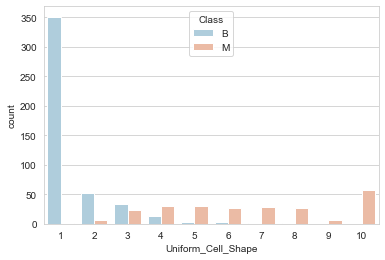

In [15]:
sbn.set_style('whitegrid')
sbn.countplot(x=base['Uniform_Cell_Shape'], data=base,hue=base['Class'], palette='RdBu_r')

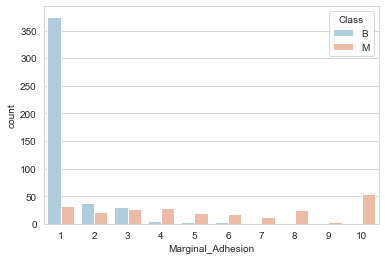

In [16]:
sbn.set_style('whitegrid')
sbn.countplot(x=base['Marginal_Adhesion'], data=base,hue=base['Class'], palette='RdBu_r')

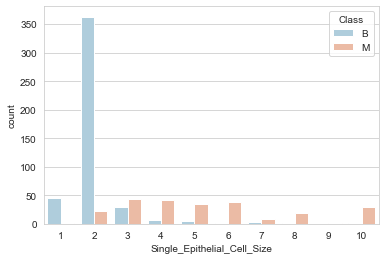

In [17]:
sbn.set_style('whitegrid')
sbn.countplot(x=base['Single_Epithelial_Cell_Size'], data=base,hue=base['Class'], palette='RdBu_r')

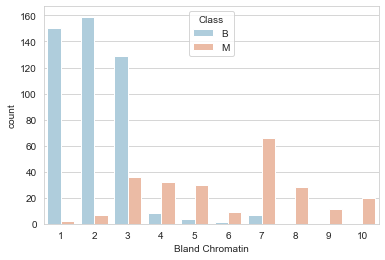

In [18]:
sbn.set_style('whitegrid')
sbn.countplot(x=base['Bland Chromatin'], data=base,hue=base['Class'], palette='RdBu_r')

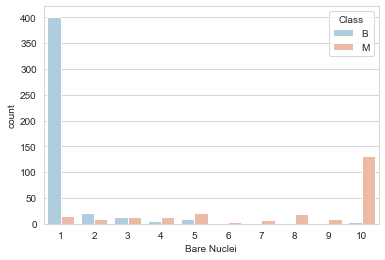

In [19]:

sbn.set_style('whitegrid')
sbn.countplot(x=base['Bare Nuclei'], data=base,hue=base['Class'], palette='RdBu_r')

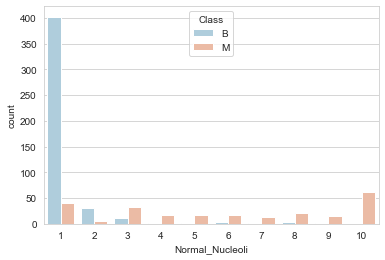

In [20]:
sbn.set_style('whitegrid')
sbn.countplot(x=base['Normal_Nucleoli'], data=base,hue=base['Class'], palette='RdBu_r')

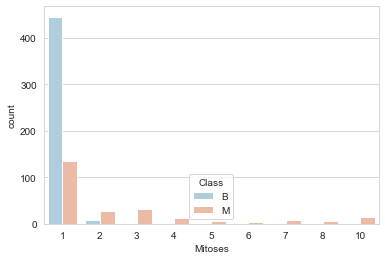

In [21]:
sbn.set_style('whitegrid')
sbn.countplot(x=base['Mitoses'], data=base,hue=base['Class'], palette='RdBu_r')

Nos dados é possivel observar um padrão linear, onde em todas as features é possivel traçar um linear que separa as classes minimamente.

A maior parte das features segue um padrão onde os valores até 3 estão associados a Classe B e todos os outros a classe M. a unica feature que não segue esse padrão é 'Clump _Thickness'

In [22]:
for x in range(699):
    if base.iloc[x,9] == 'B':
        base.iloc[x,9] = 1
    if base.iloc[x,9] == 'M':
        base.iloc[x,9] = 0

base.corr()

,Clump _Thickness,Uniform_Cell_Size,Uniform_Cell_Shape,Marginal_Adhesion,Single_Epithelial_Cell_Size,Bare Nuclei,Bland Chromatin,Normal_Nucleoli,Mitoses,Class
Clump _Thickness,1.000000,0.644913,0.654589,0.486356,0.521816,0.596724,0.558428,0.535835,0.350034,-0.716001
Uniform_Cell_Size,0.644913,1.000000,0.906882,0.705582,0.751799,0.690648,0.755721,0.722865,0.458693,-0.817904
Uniform_Cell_Shape,0.654589,0.906882,1.000000,0.683079,0.719668,0.712565,0.735948,0.719446,0.438911,-0.818934
Marginal_Adhesion,0.486356,0.705582,0.683079,1.000000,0.599599,0.659875,0.666715,0.603352,0.417633,-0.696800
Single_Epithelial_Cell_Size,0.521816,0.751799,0.719668,0.599599,1.000000,0.577524,0.616102,0.628881,0.479101,-0.682785
Bare Nuclei,0.596724,0.690648,0.712565,0.659875,0.577524,1.000000,0.680485,0.580969,0.338621,-0.825536
Bland Chromatin,0.558428,0.755721,0.735948,0.666715,0.616102,0.680485,1.000000,0.665878,0.344169,-0.756616
Normal_Nucleoli,0.535835,0.722865,0.719446,0.603352,0.628881,0.580969,0.665878,1.000000,0.428336,-0.712244
Mitoses,0.350034,0.458693,0.438911,0.417633,0.479101,0.338621,0.344169,0.428336,1.000000,-0.423170
Class,-0.716001,-0.817904,-0.818934,-0.696800,-0.682785,-0.825536,-0.756616,-0.712244,-0.423170,1.000000


A Correlação demonstra esse padrão visto na analise dos graficos, com as variaveis com correlações altas entre si o que me permite realisar feature selection

## Desenvolvimento ML

O objetivo nos modelos a seguir será maximizar a precisão do cancer maligno ( por esse motivo seu valor foi mudado para 0 anteriormente) pois seria péssimo para o paciente o informar que seu cancer é beligno quando, na verdade, ele é maligno

In [23]:
y = base['Class']
base.drop(['Class'], axis=1, inplace=True)

A partir da EDA surgiram algumas idéias. 

### Ideia 1 :

Usar todas as features menos as com correlação > 0.9

In [24]:
df_1 = base.drop(['Uniform_Cell_Size'], axis=1)

### Ideia 2 :

Usar as features que parecem resumir a tendência dos dados observados nos graficos e que possuem maior correlação com as classes

In [25]:
df_2 = base[['Uniform_Cell_Shape','Bare Nuclei','Bland Chromatin','Clump _Thickness',"Normal_Nucleoli"]]

### Testando

Para testar estas ideias irei usar o algoritmo Random Forest e irei avaliar o desempenho a partir da validação cruzada e precisão

In [26]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

In [27]:
classificador = RandomForestClassifier(n_estimators=100, criterion='entropy', random_state=0)

resultados = cross_val_score(classificador, base, y, cv = 10, scoring='precision')

print(resultados.mean())
resultados

0.9723438080134921


array([0.91489362, 0.93877551, 1.        , 0.97619048, 1.        ,
       0.97826087, 0.95833333, 0.9787234 , 0.97826087, 1.        ])

In [28]:
classificador = RandomForestClassifier(n_estimators=100, criterion='entropy', random_state=0)

resultados = cross_val_score(classificador, df_1, y, cv = 10, scoring='precision')

print(resultados.mean())
resultados

0.9824921075429863


array([0.93478261, 0.9787234 , 1.        , 0.97619048, 1.        ,
       1.        , 0.9787234 , 0.9787234 , 0.97777778, 1.        ])

In [29]:
classificador = RandomForestClassifier(n_estimators=100, criterion='entropy', random_state=0)

resultados = cross_val_score(classificador, df_2, y, cv = 10, scoring='precision')

print(resultados.mean())
resultados

0.974484141667768


array([0.93333333, 0.92      , 1.        , 0.97619048, 1.        ,
       1.        , 0.95833333, 0.9787234 , 0.97826087, 1.        ])

Após testar 3 idéias ( base completa, base < 0.9 corr e 5 features mais importantes ) cheguei a conclusão que a melhor é a base < 0.9 corr

A pesar disto vou tentar outra tecnica de redução de dimensionalidade

## PCA

In [30]:
scaler = StandardScaler()
df = scaler.fit_transform(base)

Usando o PCA

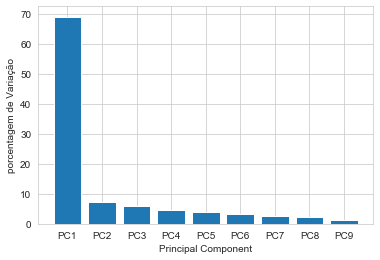

In [31]:
pca = PCA()
pca.fit(base) 
pca_data = pca.transform(base)

per_var = np.round(pca.explained_variance_ratio_* 100, decimals=1)
labels = ['PC' + str(x) for x in range(1, len(per_var)+1)]
 
plt.bar(x=range(1,len(per_var)+1), height=per_var, tick_label=labels)
plt.ylabel('porcentagem de Variação')
plt.xlabel('Principal Component')
plt.show()

A partir do grafico traçei 3 estrátegias, testar com 2, 3, 6 e 9 dimensões.

In [32]:
for x in [2,3,6,9]:
    pca = PCA(n_components=x) 
    pca.fit(base)
    pca_data = pca.transform(base)

    classificador = RandomForestClassifier(n_estimators=100, criterion='entropy', random_state=0)

    resultados = cross_val_score(classificador, pca_data, y, cv = 10, scoring='precision')

    print(resultados.mean())

0.9788711871671486
0.9825550088283007
0.9886774578078926
0.9888247213779129


## Considerações Finais

Consegui encontrar modelos com resultados bom com 0.98 de precisão na classe Maligna. 